### Угадываем признак

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
data.info()

Посмотрим много ли в наших признаках пустых значений

In [ ]:
data[ pd.isnull( data['height'] ) ].head()

In [ ]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

In [ ]:
data['height'].unique()

In [3]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [ ]:
data.info()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [5]:
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head(3)

In [6]:
y = data['sex']

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [8]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [9]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

In [10]:
le.fit( data['sex'] )

LabelEncoder()

In [11]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

In [12]:
model = LogisticRegression()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
from sklearn.metrics import roc_curve

In [16]:
predictions = model.predict_proba(X_test)

In [17]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

In [21]:
from matplotlib import pyplot as plt

In [ ]:
plt.plot( fpr, tpr )

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, predictions[:, 1])

## Домашнее задание

Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [18]:
def predict_counts(predicted_probs, Y_test, thresh):

    tp = 0 # True positive
    fp = 0 # False positive
    tn = 0 # True negative
    fn = 0 # False negative

    for predicted_prob, actual in sorted(zip( predicted_probs, Y_test )):

        prediction = 1 if predicted_prob >= thresh else 0

        if prediction == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 0:
                tn += 1
            else:
                fn += 1

    return tp, fp, tn, fn

In [19]:
tpr_custom = []  # aka, Recall
fpr_custom = []
precision_custom = []

for threshold in range(0, 25):
    tp_, fp_, tn_, fn_ = predict_counts(predictions[:, 1], y_test, threshold / 25)
    
    tpr_custom.append(tp_ / (tp_ + fn_))
    fpr_custom.append(fp_ / (fp_ + tn_))
    precision_custom.append(tp_ / (tp_ + fp_))


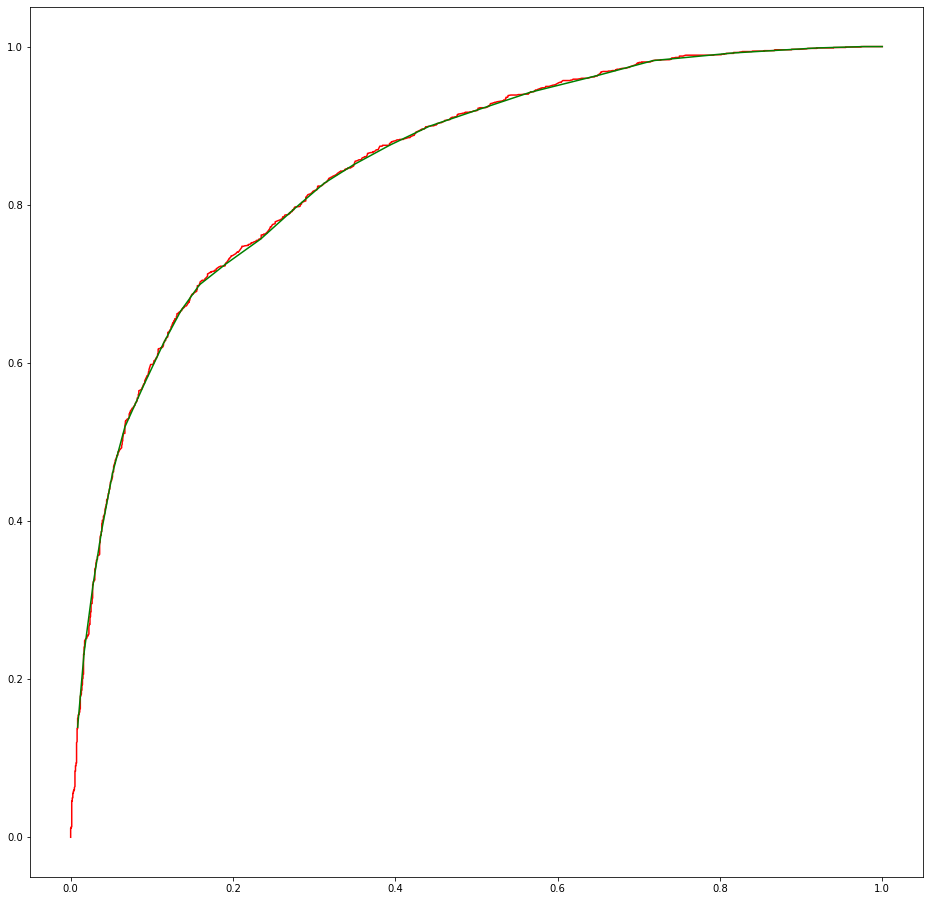

In [22]:
plt.figure(1, figsize=(16,16))
plt.plot(fpr, tpr, color='red')
plt.plot(fpr_custom, tpr_custom, color='green')

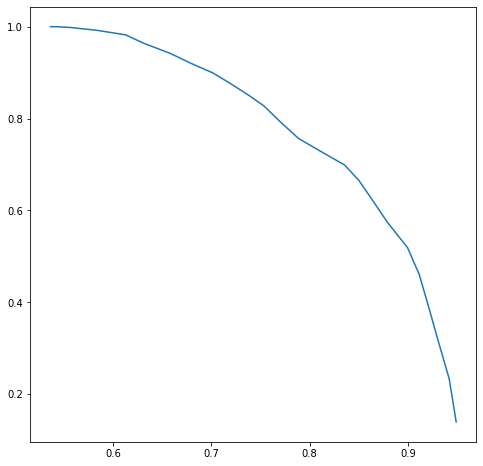

In [23]:
plt.figure(1, figsize=(8,8))
plt.plot(precision_custom, tpr_custom)